In [8]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt 
import warnings
warnings.filterwarnings('ignore')

In [12]:
# load file
df = pd.read_csv('loan_sanction_test.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban
...,...,...,...,...,...,...,...,...,...,...,...,...
362,LP002971,Male,Yes,3+,Not Graduate,Yes,4009,1777,113.0,360.0,1.0,Urban
363,LP002975,Male,Yes,0,Graduate,No,4158,709,115.0,360.0,1.0,Urban
364,LP002980,Male,No,0,Graduate,No,3250,1993,126.0,360.0,NaN,Semiurban
365,LP002986,Male,Yes,0,Graduate,No,5000,2393,158.0,360.0,1.0,Rural


# Data Exploration

In [75]:
# information about the data frame 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [77]:
df.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

## data cleaning

### filling missing values

#### Gender column

In [81]:
df['Gender'].mode()[0]

'Male'

In [83]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)

In [85]:
df['Gender'].isnull().sum()

0

In [91]:
df['Gender'].value_counts()

Gender
Male      297
Female     70
Name: count, dtype: int64

#### Dependents  column

In [99]:
df['Dependents'].mode()[0]

'0'

In [101]:
df['Dependents'].fillna(df['Dependents'].mode()[0], inplace= True)

In [105]:
df['Dependents'].value_counts() 

Dependents
0     210
2      59
1      58
3+     40
Name: count, dtype: int64

In [107]:
df['Dependents'] = df['Dependents'].replace('3+',3).astype(int)

In [109]:
df['Dependents'].value_counts() 

Dependents
0    210
2     59
1     58
3     40
Name: count, dtype: int64

#### Self_Employed column

In [120]:
df['Self_Employed'].mode()[0]

'No'

In [122]:
df['Self_Employed'].fillna(df["Self_Employed"].mode()[0], inplace= True)

In [128]:
df['Self_Employed'].value_counts()

Self_Employed
No     330
Yes     37
Name: count, dtype: int64

#### LoanAmount  column

In [147]:
df['LoanAmount'].median()

125.0

In [151]:
df['LoanAmount'].fillna(df['LoanAmount'].median(0), inplace = True)

In [153]:
df['LoanAmount'].value_counts()

LoanAmount
125.0    16
150.0    12
110.0    10
100.0     9
90.0      9
         ..
71.0      1
157.0     1
93.0      1
61.0      1
98.0      1
Name: count, Length: 144, dtype: int64

#### Loan_Amount_Term column

In [158]:
df['Loan_Amount_Term'].mode()[0]

360.0

In [160]:
df['Loan_Amount_Term'].fillna(df['Loan_Amount_Term'].mode()[0], inplace=True)

In [162]:
df['Loan_Amount_Term'].value_counts()

Loan_Amount_Term
360.0    317
180.0     22
480.0      8
300.0      7
240.0      4
84.0       3
60.0       1
12.0       1
350.0      1
36.0       1
120.0      1
6.0        1
Name: count, dtype: int64

#### Credit_History column

In [165]:
df['Credit_History'].mode()[0]

1.0

In [167]:
df['Credit_History'].fillna(df['Credit_History'].mode()[0], inplace=True)

In [169]:
df['Credit_History'].value_counts()

Credit_History
1.0    308
0.0     59
Name: count, dtype: int64

## Summarize basic statistics

In [183]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             367 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         367 non-null    int32  
 4   Education          367 non-null    object 
 5   Self_Employed      367 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         367 non-null    float64
 9   Loan_Amount_Term   367 non-null    float64
 10  Credit_History     367 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int32(1), int64(2), object(6)
memory usage: 33.1+ KB


In [189]:
df.describe()

,Dependents,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,367.000000,367.000000,367.000000,367.000000,367.000000,367.000000
mean,0.806540,4805.599455,1569.577657,135.980926,342.822888,0.839237
std,1.065177,4910.685399,2334.232099,60.959739,64.658402,0.367814
min,0.000000,0.000000,0.000000,28.000000,6.000000,0.000000
25%,0.000000,2864.000000,0.000000,101.000000,360.000000,1.000000
50%,0.000000,3786.000000,1025.000000,125.000000,360.000000,1.000000
75%,2.000000,5060.000000,2430.500000,157.500000,360.000000,1.000000
max,3.000000,72529.000000,24000.000000,550.000000,480.000000,1.000000


#  Data Visualization

## Univariate Analysis

### Explore the distribution of numeric columns

In [263]:
num_cols = ['ApplicantIncome','CoapplicantIncome', 'LoanAmount','Loan_Amount_Term']

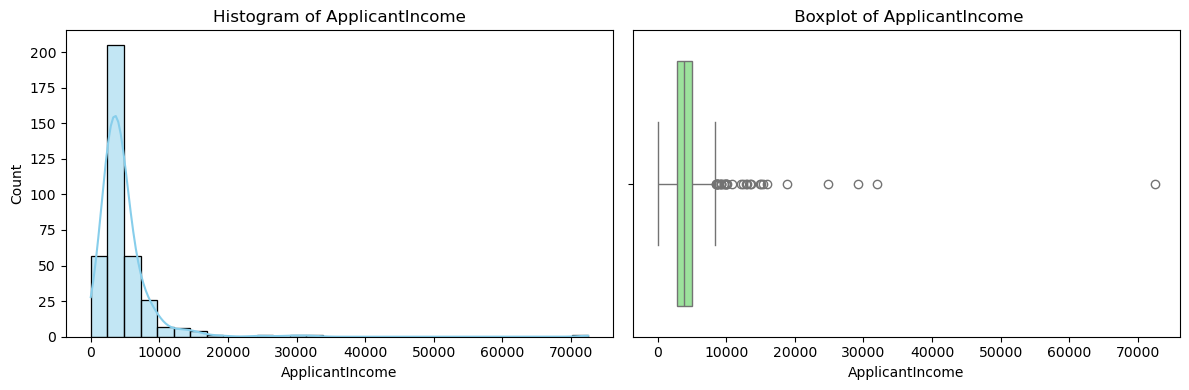

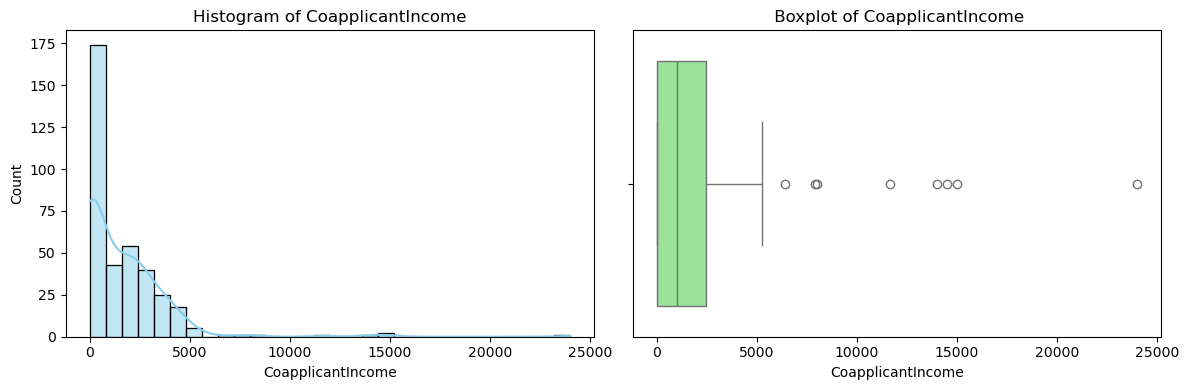

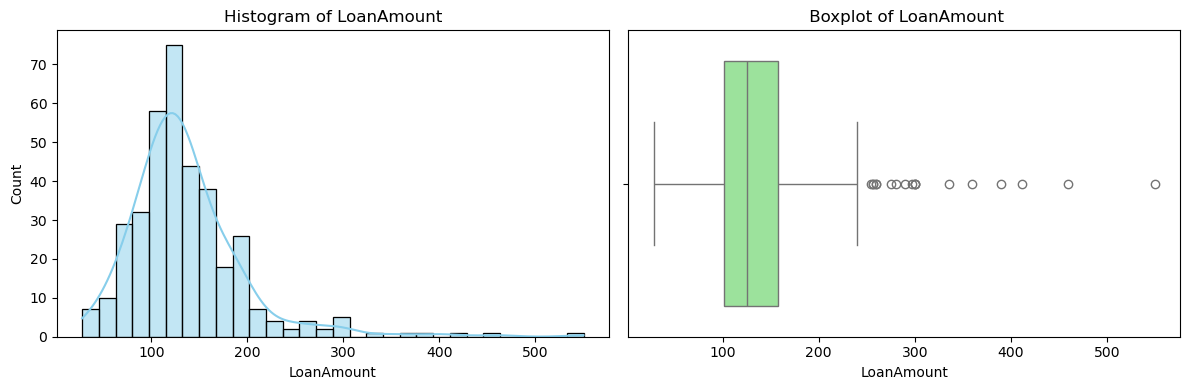

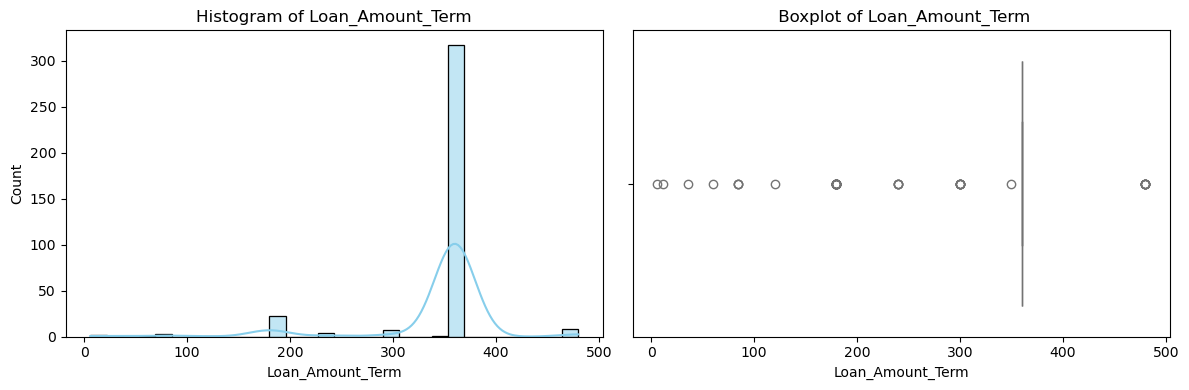

In [267]:
for col in num_cols :
    fig, axes = plt.subplots(1,2,figsize= (12,4)) 
# histogram plot 
    sns.histplot(df[col], kde= True, bins= 30, ax= axes[0], color='skyblue') 
    axes[0].set_title(f'Histogram of {col}') 
# for boxplot 
    sns.boxplot(x = df[col], ax= axes[1], color='lightgreen') 
    axes[1].set_title(f' Boxplot of {col}') 
    
    plt.tight_layout()
    plt.show()

### Analyze categorical variables 

In [3]:
cat_cols = ['Gender','Married','Education','Self_Employed','Credit_History','Property_Area']

#### Bar Charts

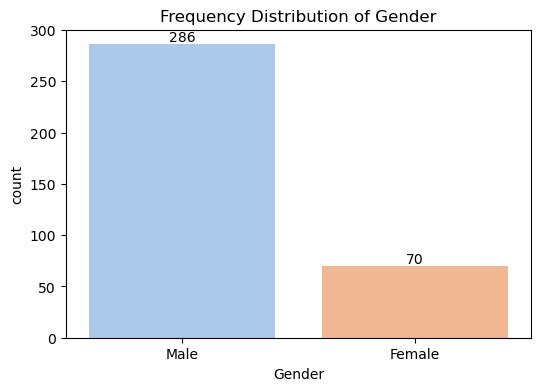

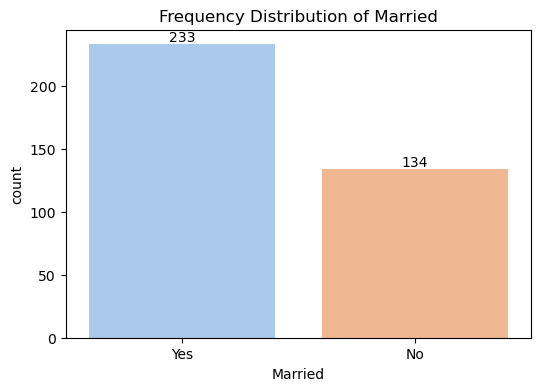

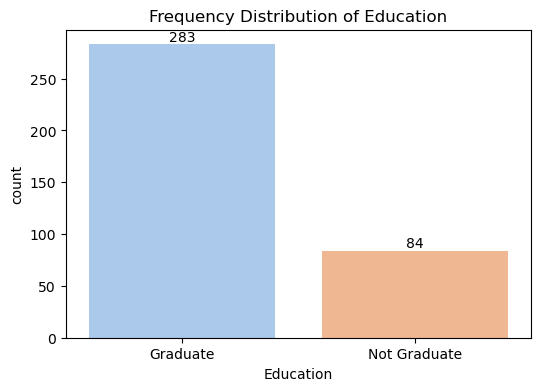

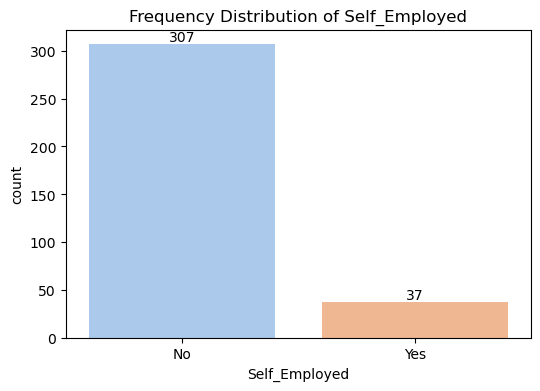

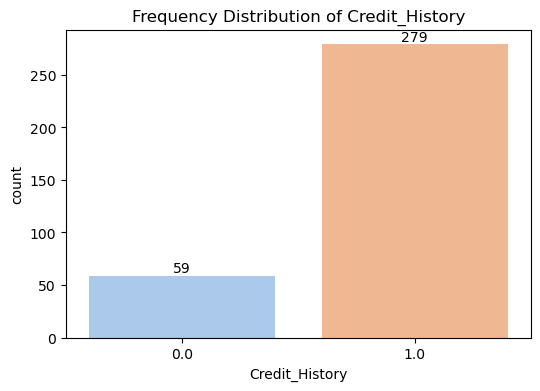

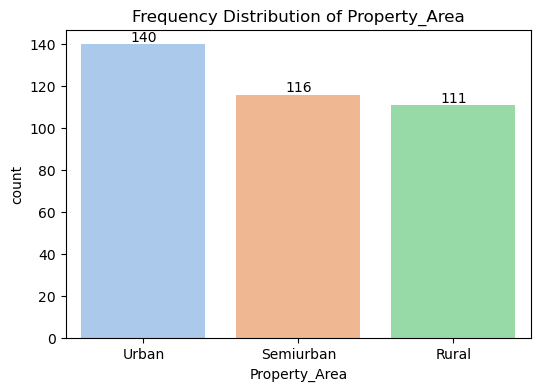

In [14]:
for col in cat_cols:
    plt.figure(figsize=(6,4))
    ax = sns.countplot(x = df[col], palette= 'pastel')
    for container in ax.containers: ax.bar_label(container, fmt= '%.0f')
    plt.title(f'Frequency Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.show()

####  Pie Charts

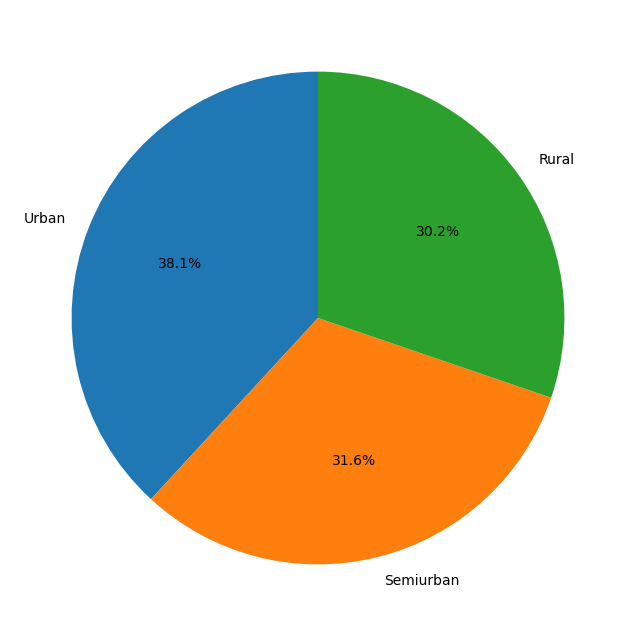

In [245]:
property_area_counts = df['Property_Area'].value_counts()
plt.figure(figsize=(8,8))
property_area_counts.plot.pie(autopct ='%1.1f%%',startangle = 90) 

plt.ylabel('') 
plt.show()

## Bivariate Analysis

In [18]:
cate_cols = ['Gender','Married','Dependents','Education','Self_Employed','Credit_History','Property_Area']

In [20]:
numerical_col= ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount', 'Loan_Amount_Term','Credit_History']

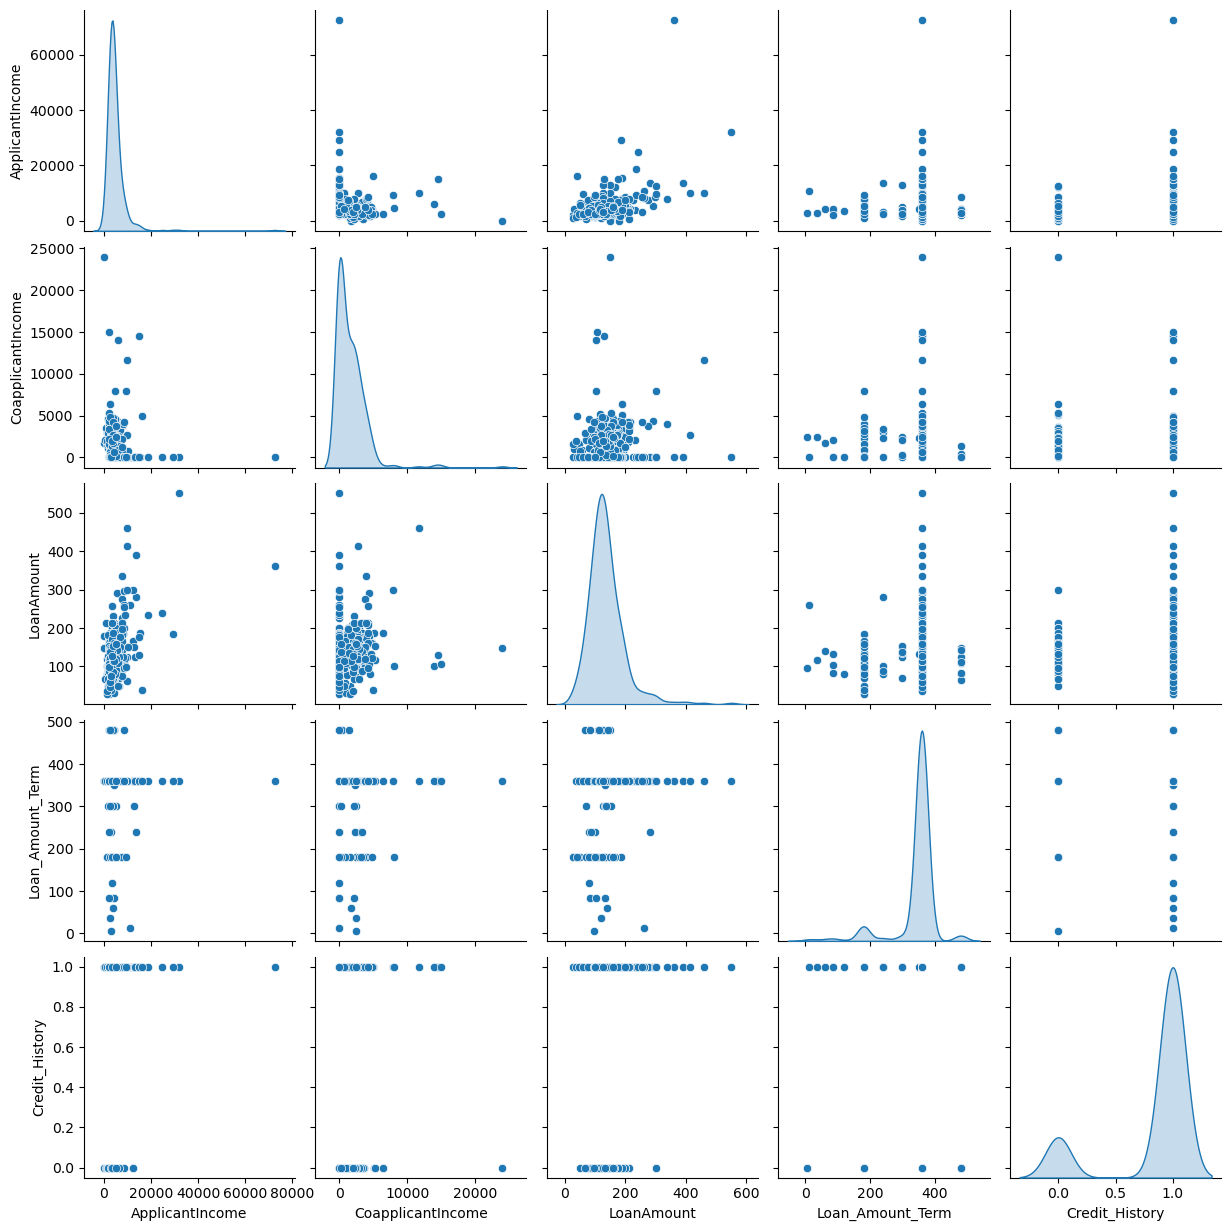

In [271]:
sns.pairplot(df[numerical_col],diag_kind="kde") 
plt.show()

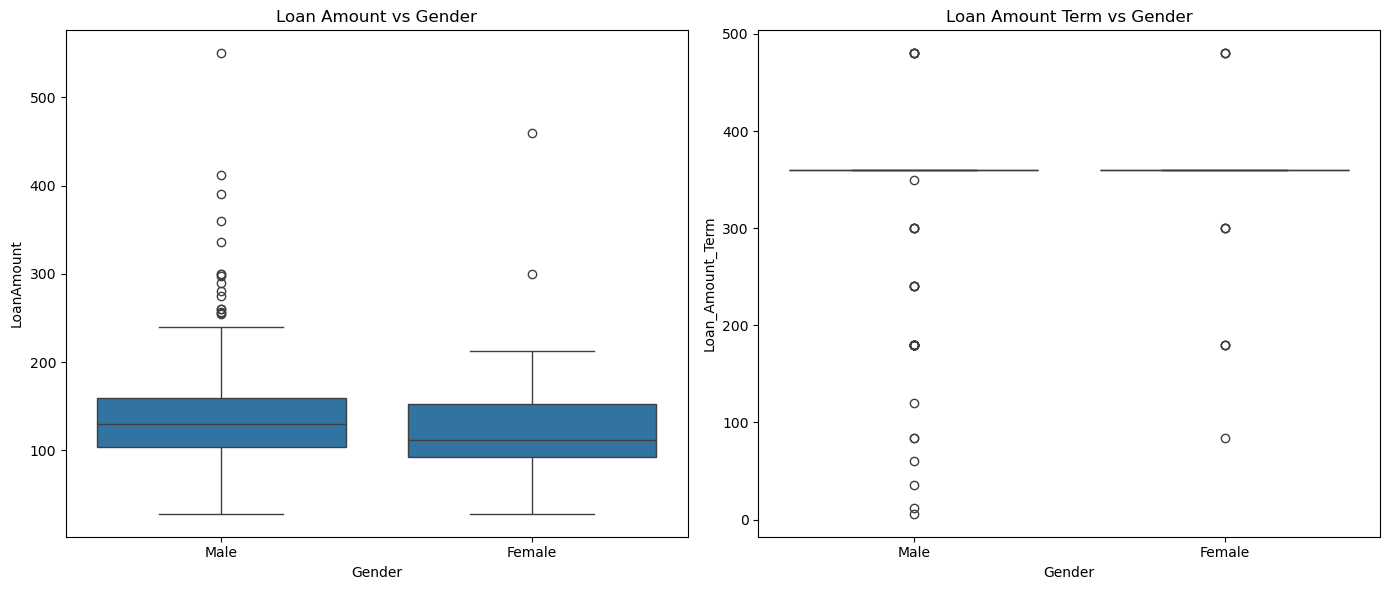

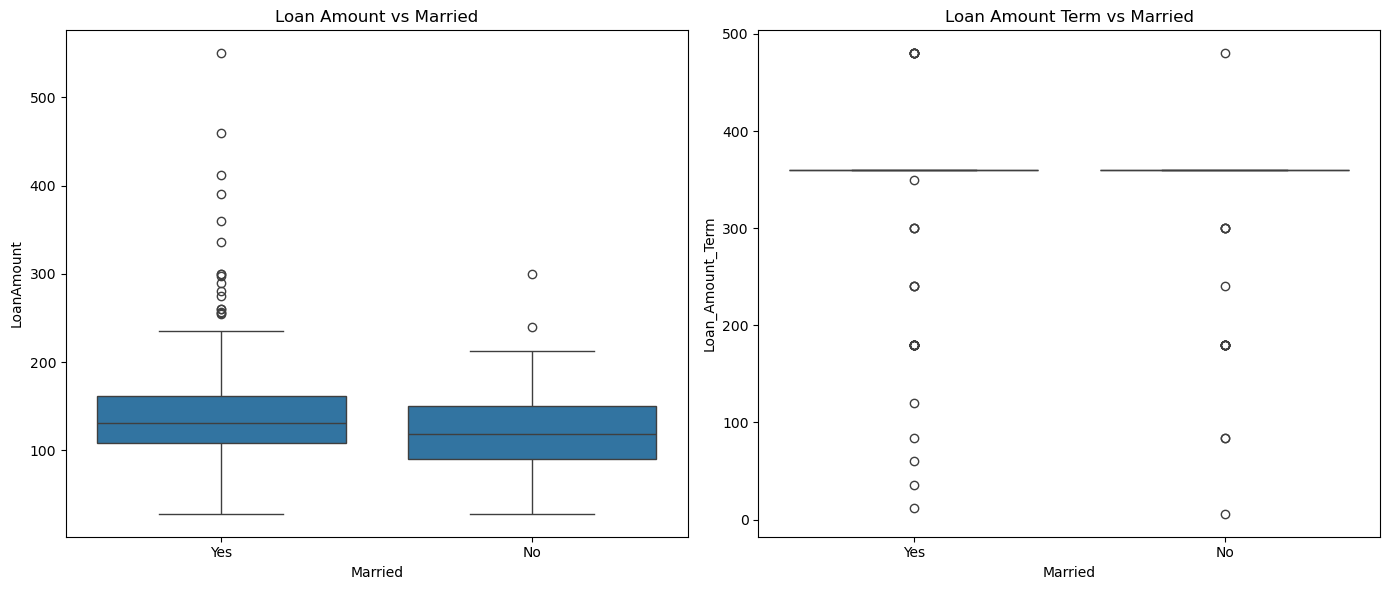

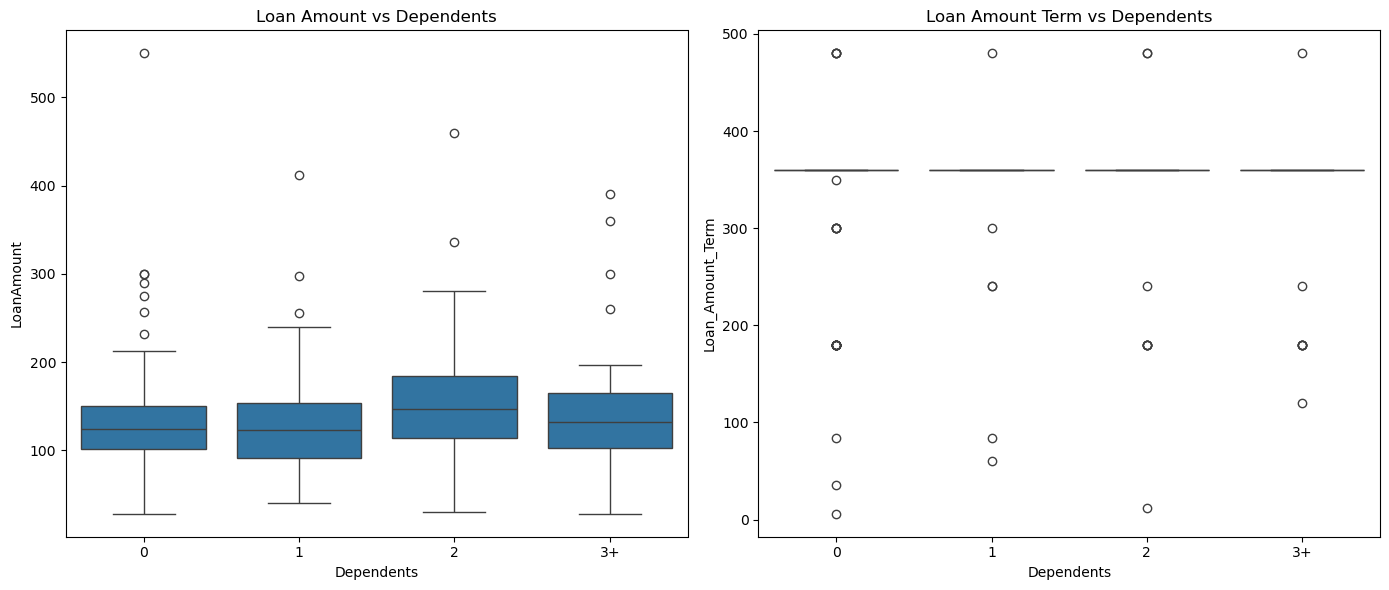

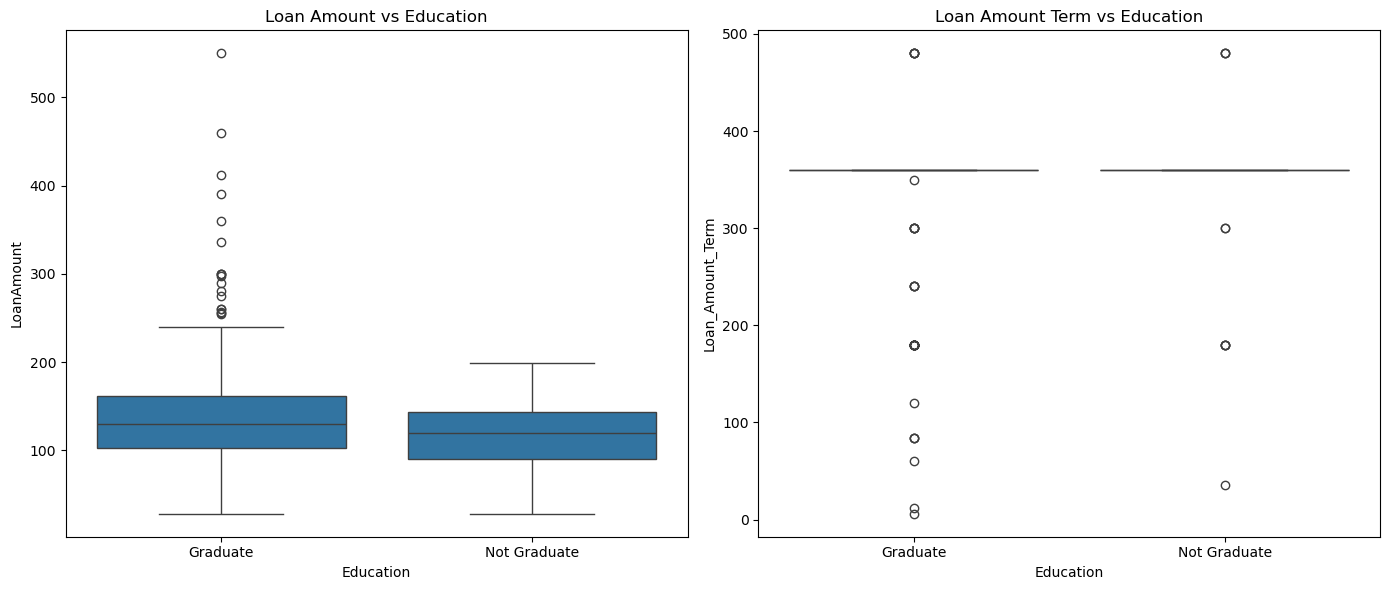

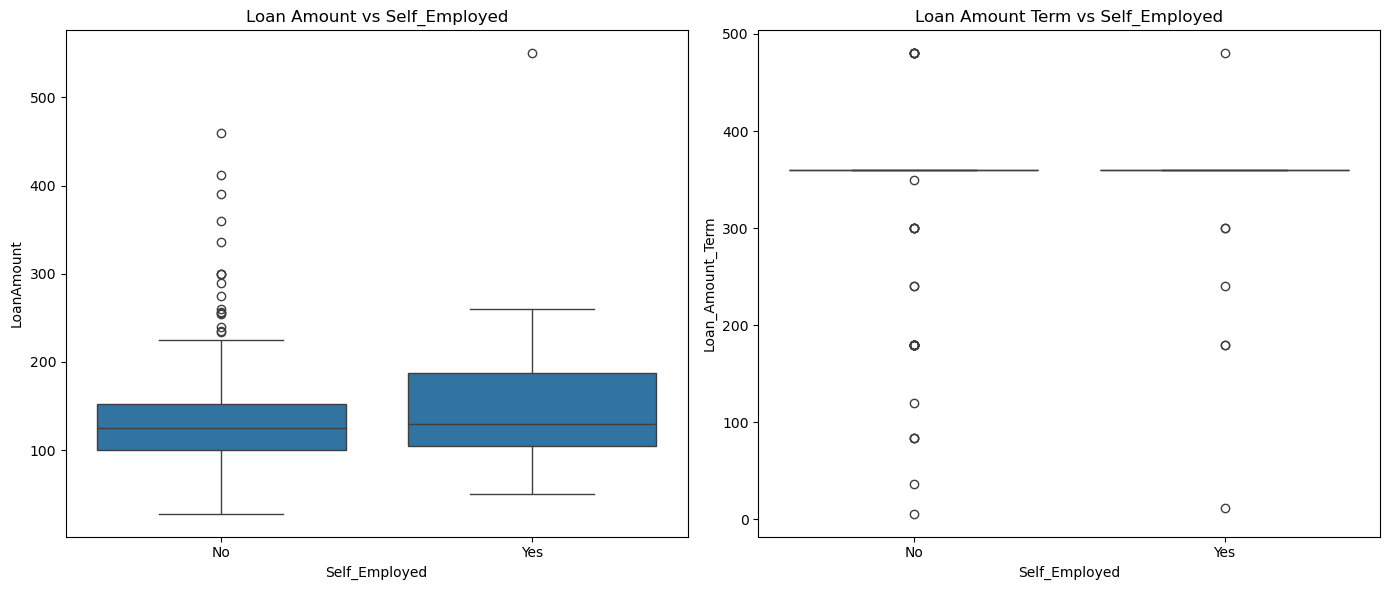

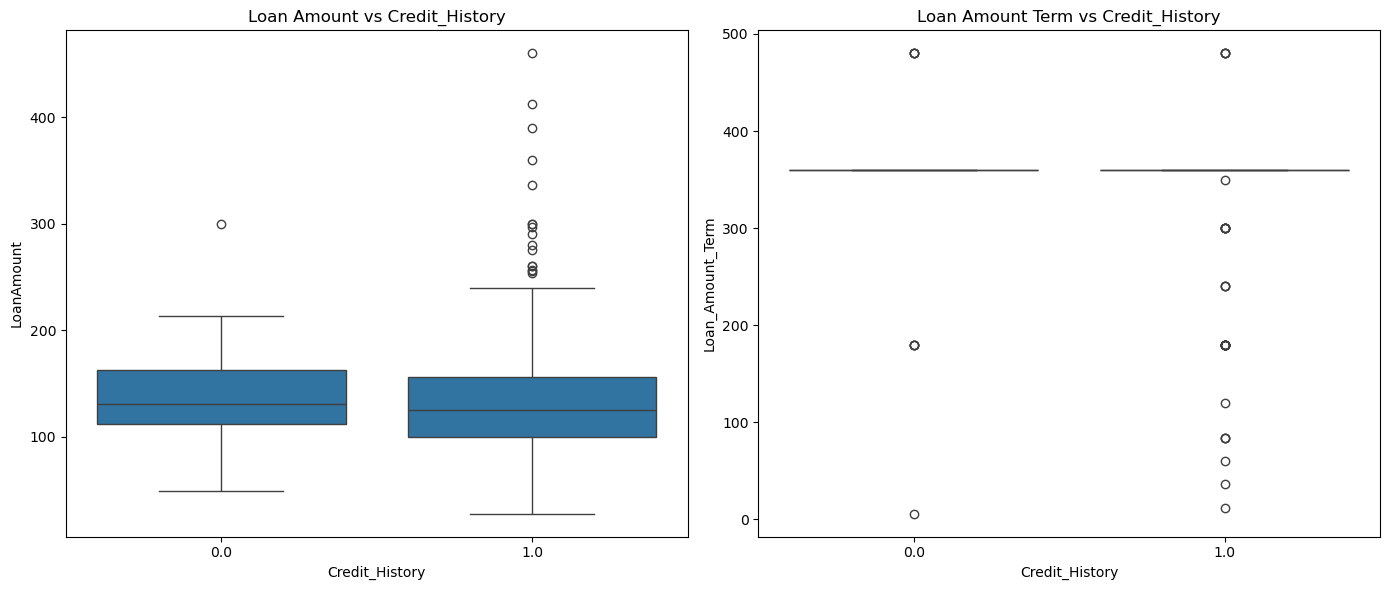

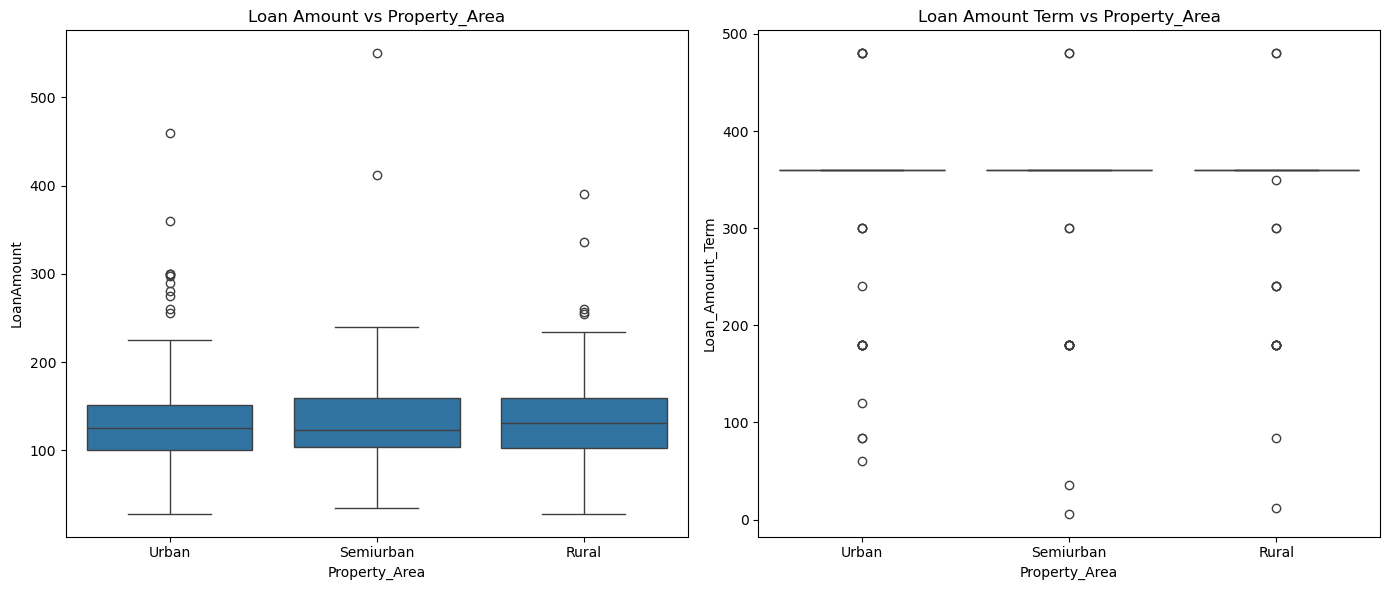

In [26]:
for col in cate_cols: 
    fig, axes= plt.subplots(1,2,figsize=(14,6)) 
# Boxplot for Loan Amount 
    sns.boxplot(x = col, y = "LoanAmount", data = df, ax = axes[0]) 
    axes[0].set_title(f'Loan Amount vs {col}')  
# Boxplot for Loan_Amount_Term 
    sns.boxplot(x = col, y= 'Loan_Amount_Term', data= df, ax= axes[1])
    axes[1].set_title(f'Loan Amount Term vs {col}') 
    plt.tight_layout()
    plt.show()

## Multivariate Analysis

In [292]:
numerical_cols = ['Dependents','ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History']

In [298]:
corr_matrix =  df[numerical_cols].corr() 
print(corr_matrix)

                   Dependents  ApplicantIncome  CoapplicantIncome  LoanAmount  \
Dependents           1.000000         0.138004          -0.050024    0.134761   
ApplicantIncome      0.138004         1.000000          -0.110335    0.488737   
CoapplicantIncome   -0.050024        -0.110335           1.000000    0.150034   
LoanAmount           0.134761         0.488737           0.150034    1.000000   
Loan_Amount_Term    -0.053460         0.023319          -0.008633    0.091867   
Credit_History      -0.051705         0.094944          -0.058004   -0.012932   

                   Loan_Amount_Term  Credit_History  
Dependents                -0.053460       -0.051705  
ApplicantIncome            0.023319        0.094944  
CoapplicantIncome         -0.008633       -0.058004  
LoanAmount                 0.091867       -0.012932  
Loan_Amount_Term           1.000000       -0.048189  
Credit_History            -0.048189        1.000000  


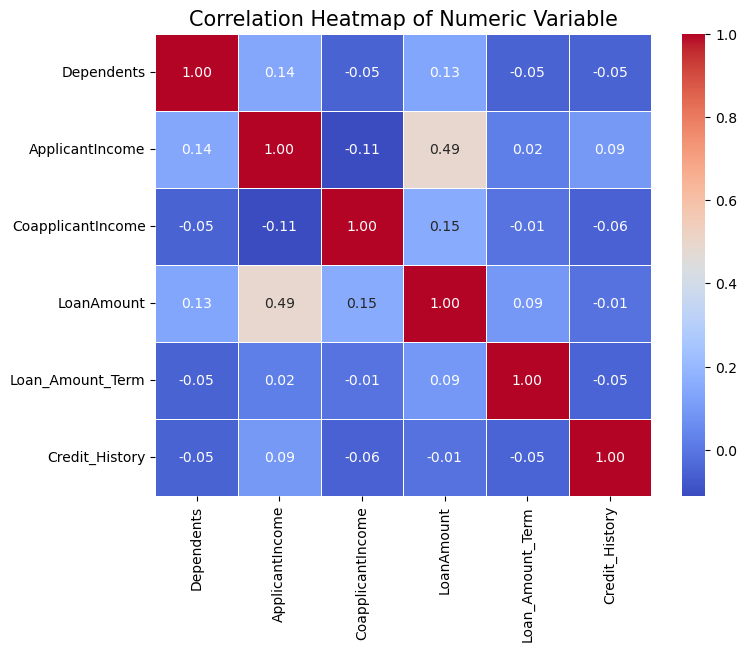

In [300]:
# heat map visualization
plt.figure(figsize=(8,6)) 
sns.heatmap(corr_matrix, annot= True, cmap= 'coolwarm', linewidths= 0.5, fmt='.2f') 
plt.title('Correlation Heatmap of Numeric Variable', fontsize =15) 
plt.show()

In [286]:
cat_cols

['Gender',
 'Married',
 'Education',
 'Self_Employed',
 'Credit_History',
 'Property_Area']

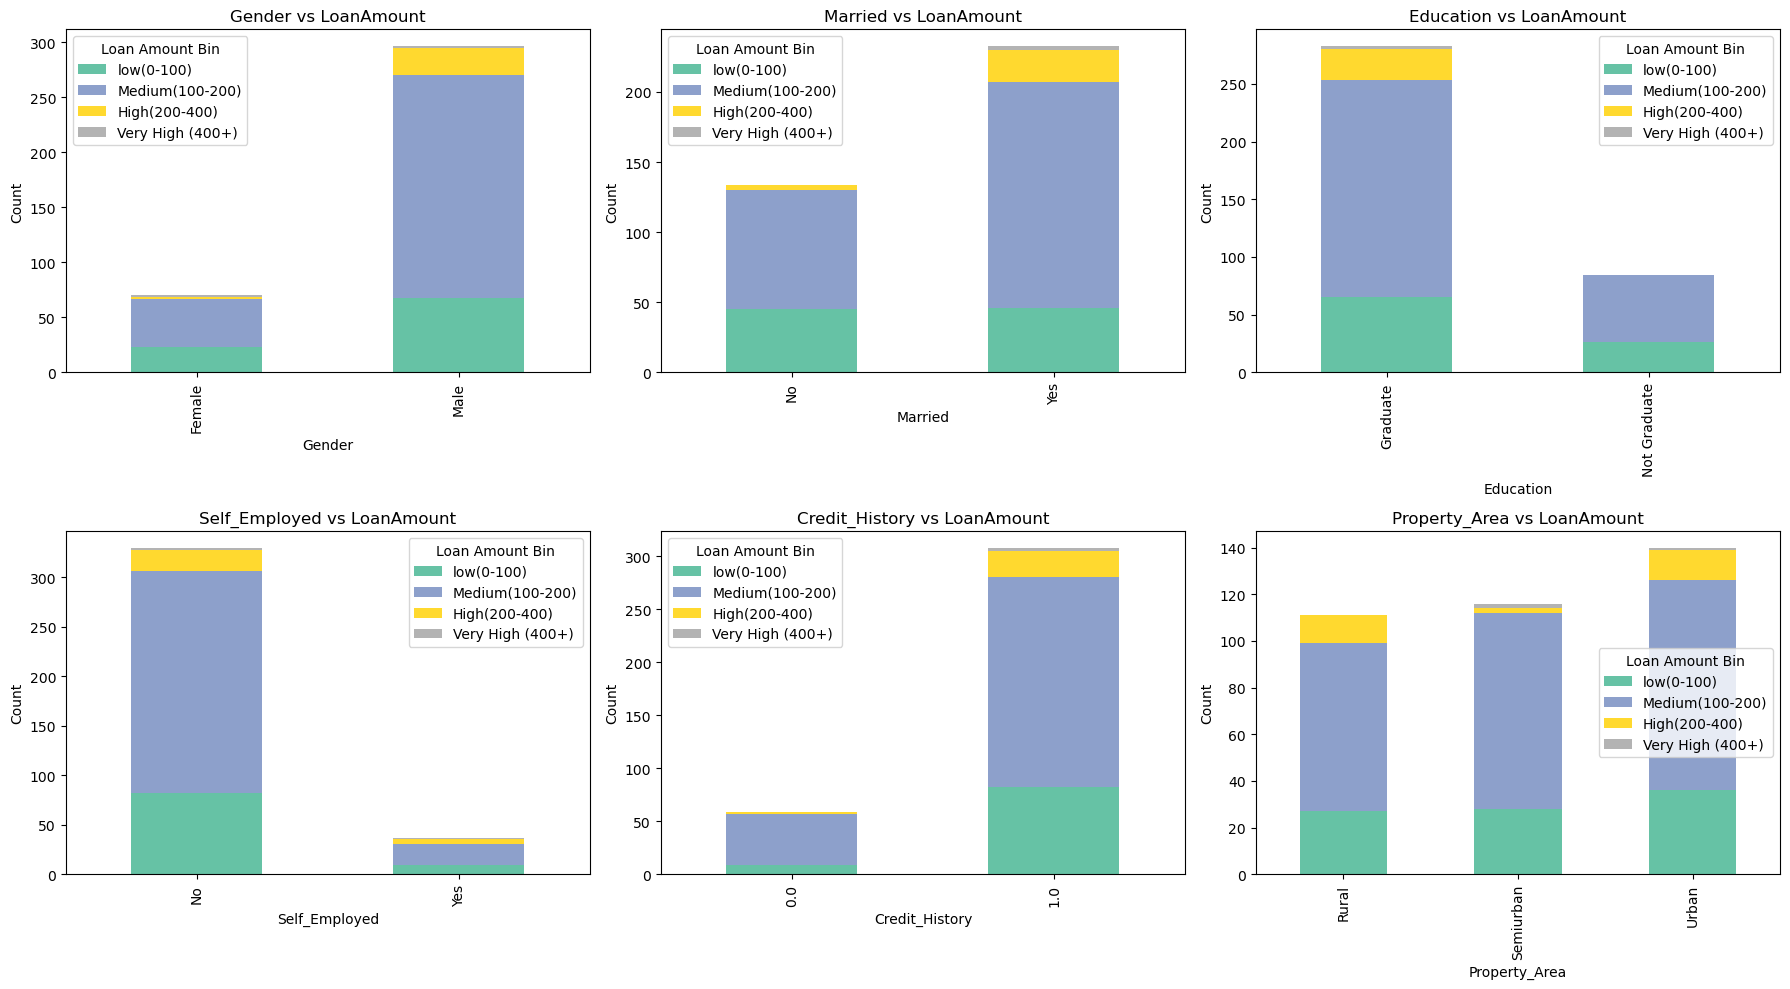

In [326]:
df['LoanAmount_Bin']= pd.cut(df['LoanAmount'], bins = [0,100,200,400,700], labels=['low(0-100)','Medium(100-200)','High(200-400)','Very High (400+)']) 

fig, axes= plt.subplots(2,3, figsize = (18,10))

for i, col in enumerate(cat_cols): 
    ax = axes[i//3, i%3]
    cross_tab= pd.crosstab(df[col], df['LoanAmount_Bin'])
    cross_tab.plot(kind = 'bar', stacked = True, ax= ax, colormap = 'Set2')
    ax.set_title(f'{col} vs LoanAmount') 
    ax.set_ylabel('Count')
    ax.set_xlabel(col)
    ax.legend(title= 'Loan Amount Bin')
    
plt.tight_layout()
plt.show()

# Geospatial Analysis

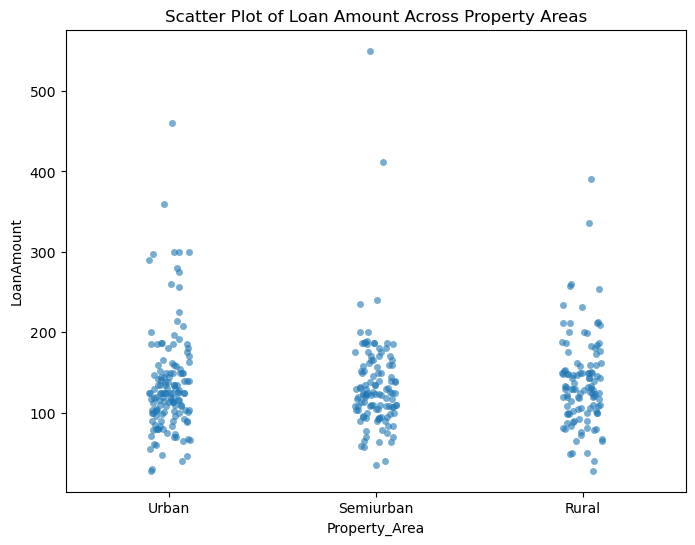

In [340]:
plt.figure(figsize=(8,6)) 
sns.stripplot(x = 'Property_Area', y='LoanAmount', data= df, jitter=True, alpha = 0.6) 
plt.title('Scatter Plot of Loan Amount Across Property Areas')
plt.show()

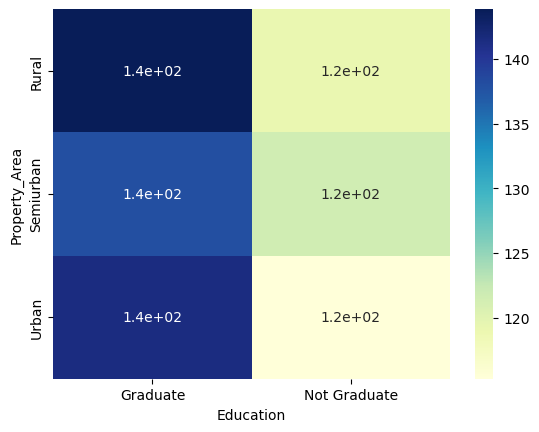

In [336]:
pivot = df.pivot_table(values= 'LoanAmount', index='Property_Area',columns='Education', aggfunc='mean')
sns.heatmap(pivot, annot=True, cmap='YlGnBu')
plt.show()

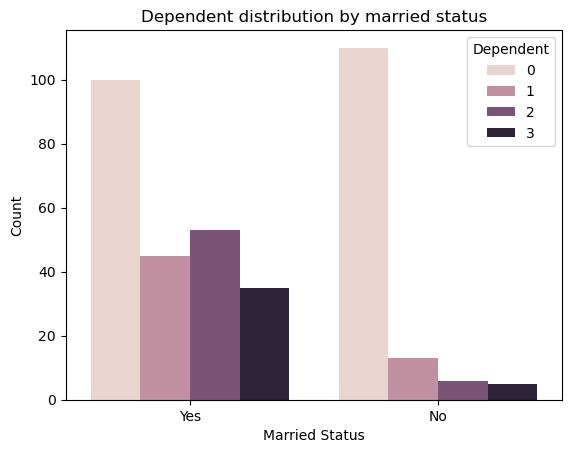

In [345]:
sns.countplot(data=df, x= df['Married'], hue= df['Dependents'])
plt.title('Dependent distribution by married status')
plt.xlabel('Married Status')
plt.ylabel('Count')
plt.legend(title= 'Dependent')
plt.show()

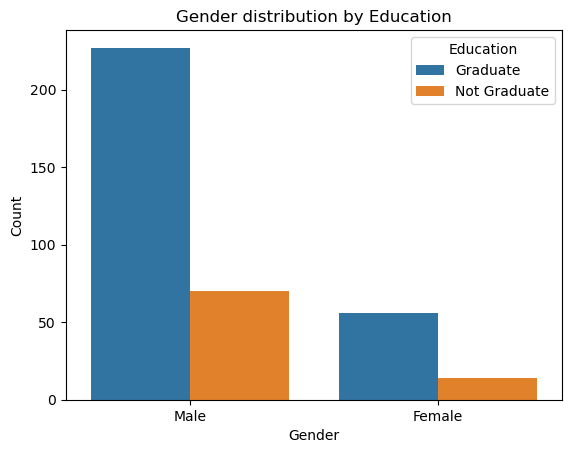

In [349]:
sns.countplot(data=df, x= df['Gender'], hue= df['Education'])
plt.title('Gender distribution by Education')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title= 'Education')
plt.show()

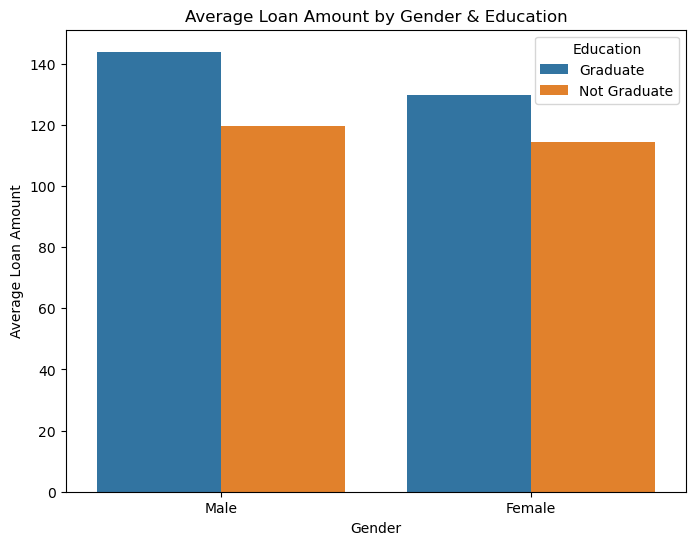

In [353]:
plt.figure(figsize=(8,6))
sns.barplot(data=df, x= df['Gender'], y= df['LoanAmount'], hue= df['Education'], estimator=np.mean, ci = None)
plt.title('Average Loan Amount by Gender & Education')
plt.ylabel('Average Loan Amount')
plt.show()

In [ ]:
Education matters in loan amount mostly male and female graduate requested higher loan amount in compare with non graduate. 
Business implication : bank may need to design loan product targeting Women Borrower, espically non- graduate.

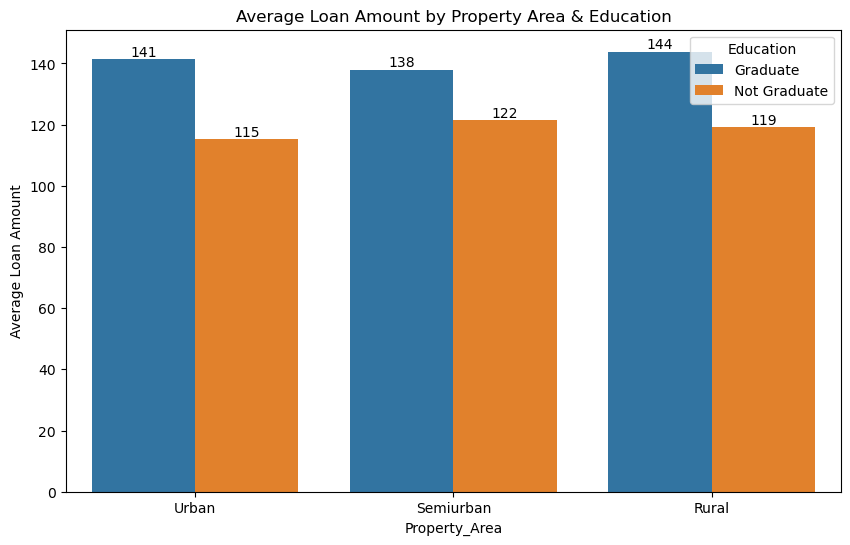

In [365]:
plt.figure(figsize=(10,6))
ax= sns.barplot(data=df, x= df['Property_Area'], y= df['LoanAmount'], hue= df['Education'], estimator=np.mean, ci = None)
for container in ax.containers: ax.bar_label(container, fmt= '%.0f')
plt.title('Average Loan Amount by Property Area & Education')
plt.ylabel('Average Loan Amount')
plt.show()

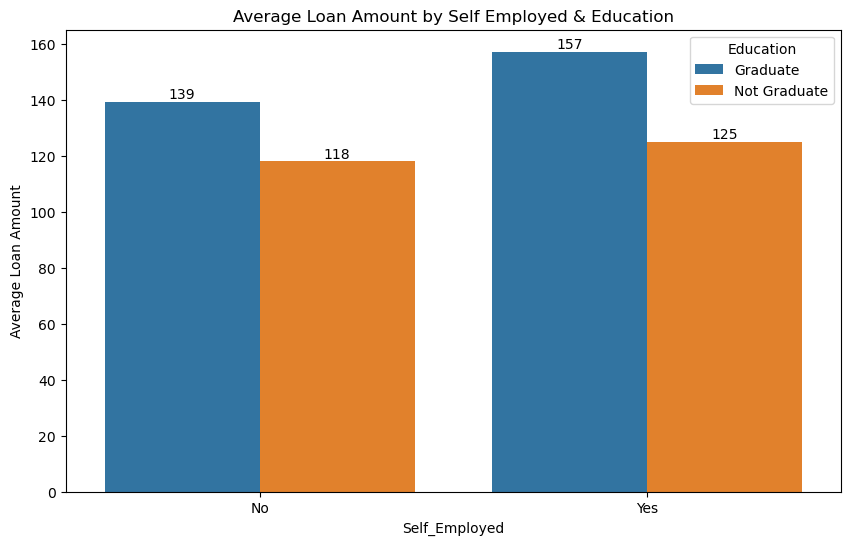

In [385]:
plt.figure(figsize=(10,6))
ax= sns.barplot(data=df, x= df['Self_Employed'], y= df['LoanAmount'], hue= df['Education'], estimator=np.mean, ci = None)
for container in ax.containers: ax.bar_label(container, fmt= '%.0f')
plt.title('Average Loan Amount by Self Employed & Education')
plt.ylabel('Average Loan Amount')
plt.show()

<Figure size 1000x600 with 0 Axes>

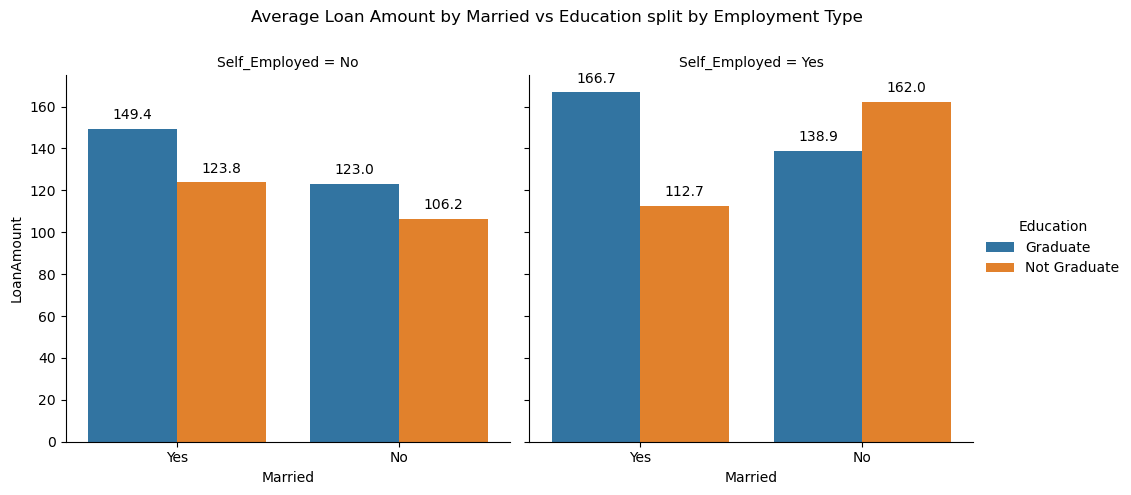

In [411]:
plt.figure(figsize=(10,6))
g = sns.catplot(data=df, x = 'Married',y = 'LoanAmount', hue='Education',
            col='Self_Employed',kind='bar', estimator=np.mean, ci=None, height=5, aspect=1) 
g.fig.subplots_adjust(top=0.85)
#g.fig.subplots_adjust(top = 0.85) 
g.fig.suptitle('Average Loan Amount by Married vs Education split by Employment Type')

for ax in g.axes.flat:
    for p in ax.patches:
        if p.get_height() > 0:
            ax.annotate( format(p.get_height(), '.1f'),
                    (p.get_x()+ p.get_width()/2., p.get_height()),
                    ha= 'center', va= 'bottom', fontsize = 10, color  = 'black',
                   xytext= (0,5), textcoords='offset points')
plt.show()